# Implementing MLP using Pytorch

## Connecting to Google Drive

In [1]:
# getting data from google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the Libraries

In [2]:
# importing the pytorch library
import torch 
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

# importing the torchvision library
import torchvision
import torchvision.transforms as transforms

# importing the matplotlib library
import matplotlib.pyplot as plt
import numpy as np
# defining the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Loading the Dataset

In [3]:
# Load the CIFAR-100 dataset
trainset = datasets.CIFAR100(root='/content/drive/MyDrive/Pytorch_data/data', train=True, transform=transforms.ToTensor() ,download=True)
testset = datasets.CIFAR100(root='/content/drive/MyDrive/Pytorch_data/data', train=False, transform=transforms.ToTensor() ,download=True)

# Create the dataloaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


## Visualizing the Data

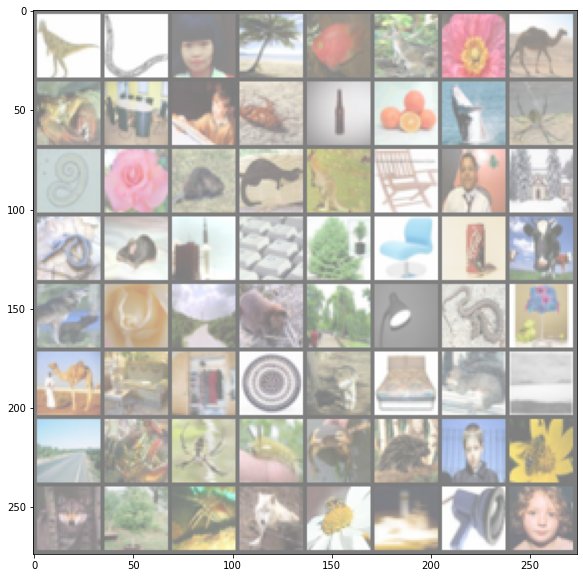

  dinosaur       worm       girl  palm_tree aquarium_fish   kangaroo      poppy      camel    lobster      table


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    fig = plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images, padding=2))

# print labels
print(' '.join('%10s' % trainset.classes[labels[j]] for j in range(10)))

## Modelling 

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the first convolutional layer
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Define the pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Define the second convolutional layer
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Define the first fully connected layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Define the second fully connected layer
        self.fc2 = nn.Linear(120, 84)
        # Define the output layer with 100 neurons for CIFAR100
        self.fc3 = nn.Linear(84, 100)

    def forward(self, x):
        # Apply the first convolutional layer
        x = self.pool(F.relu(self.conv1(x)))
        # Apply the second convolutional layer
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output tensor
        x = x.view(-1, 16 * 5 * 5)
        # Apply the first fully connected layer
        x = F.relu(self.fc1(x))
        # Apply the second fully connected layer
        x = F.relu(self.fc2(x))
        # Apply the output layer
        x = self.fc3(x)
        return x

In [6]:
#initialize the model
net = Net()

criterion = nn.CrossEntropyLoss()

# trying different optimizers with different learning rates

#optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

optimizer = optim.Adam(net.parameters(), lr=0.001) 

The model performed better with Adam optimizer with a learning rate of 0.001 compared to with the Stochastic Gradient Descent optimizer

In [7]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


## Model Evaluation

In [13]:
def Accuracy_per_10000():
  correct = 0
  total = 0
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  print('Accuracy of the network on the 10000 test images: %d %%' % (
      100 * correct / total))

In [14]:
Accuracy_per_10000()

Accuracy of the network on the 10000 test images: 25 %


In [9]:
from sklearn.metrics import f1_score

In [10]:
def scoring_net_by_F1Score(net, testloader):
    # Initialize lists
    y_pred_list = []
    y_true_list = []

    # Set model to evaluation mode
    net.eval()

    # Iterate over test data
    for images, labels in testloader:
        # Forward pass
        outputs = net(images)
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        # Append predictions
        y_pred_list.append(predicted)
        # Append ground truths
        y_true_list.append(labels)

    # Convert lists to tensors
    y_pred_list = torch.cat(y_pred_list).cpu().numpy()
    y_true_list = torch.cat(y_true_list).cpu().numpy()

    # Calculate F1 score
    return f1_score(y_true_list, y_pred_list, average='macro')

In [11]:
train_f1 = scoring_net_by_F1Score(net , trainloader)
train_f1

0.27135863123799936

In [12]:
test_f1 = scoring_net_by_F1Score(net, testloader)
test_f1

0.24155110022885215

## Conclusion

1.The model's performance was relatively poor, with an F1 score  of 27% on the training set and 24% on the testing set.

2.The Adam optimizer improved the performance of the model compared to stochastic gradient descent.


## Recommendation

The model is not complex enough, it may struggle to capture the underlying patterns in the data. You can try adding more layers, increasing the number of neurons.

The performance of the model can be highly dependent on the values of its hyperparameters. You can try different learning rates, batch sizes, optimization algorithms, and regularization techniques to find the optimal combination of hyperparameters for the model.